# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `34`
* Students: `<Valentin Morel, Xavier Sieber, Cédric Schumacher, Charles-Théophile Coen>`
* Dataset: `<Terrorist attack>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

adjacency = np.load('Adjacency1.npy') # the adjacency matrix
n_nodes = len(adjacency) # the number of nodes in the network
def number_edges(adjacency_matrix):
    n = 0
    length = len(adjacency_matrix)
    
    for i in range(0,length):
        for j in range(i,length):
            n = n + adjacency_matrix[i,j]
    return n
            
n_edges = number_edges(adjacency) # the number of edges in the network

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Your code here.
    adjacency = np.zeros((n,n))
    random.seed(seed)
    
    for i in range(0,n):
        for j in range(i+1,n):
            proba = random.random()
            #print(proba)
            if proba <= p: #check if the random probability generated is <= p; if so, put the matrix element to 1
                adjacency[i,j] = 1
                adjacency[j,i] = 1
                
    return adjacency

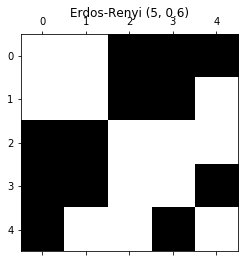

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)');

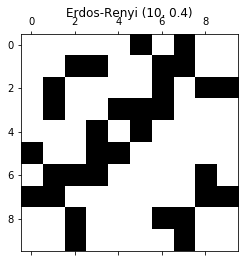

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)');

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

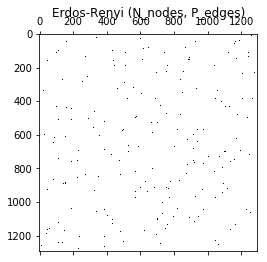

In [6]:
# Your code here.
n = n_nodes
total_edges_possible = n *(n-1)/2
p = n_edges/total_edges_possible
er_network = erdos_renyi(n, p, 123)
plt.spy(er_network)
plt.title('Erdos-Renyi (N_nodes, P_edges)');

### **Your answer here.**
For the number of nodes (n), we simply took the number of nodes in our data set. For the probability (p), we divide the number of edges present in our data set (3172) by the total number of possible edges in order to have the mean probability for two nodes to be linked. Obviously, we won't have the exact same number of edges, but we are going to be close.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [7]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)

        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # Your code here.
    adjacency = np.zeros((n,n))
    random.seed(seed)
    np.random.seed(seed)
    
    #creation of a random network with k = m0 nodes (but k >= 2) – each node needs at least one edge
    if m0 < 2:
        k = 2
    else:
        k = m0
    
    for i in range(0,k): #in this loop, for each initial node, a random edge is formed between one node of the inital network 
        numbers = [l for l in range(0,k) if l != i] #we exclude the scenario where the node links itself
        random_node = random.choice(numbers)
        adjacency[i,random_node] = 1
        adjacency[random_node,i] = 1 
        
    #adding new nodes with each m edges – probabilty of linking between two nodes given by BA
    for i in range(k,n):
        proba = []
        
        k_nom = adjacency.sum(axis = 0)
        k_tot = adjacency.sum(axis = None)
        
        for j in range(0,i):
            k_j = k_nom[j]
            proba = np.hstack((proba,k_j/k_tot)) #probability of linking between node_i and the existing nodes
                
        available_nodes = list(np.arange(0,i))
        proba_list = list(proba)
        linked_nodes = np.random.choice(available_nodes, m, replace = False, p = proba_list) #choice of node depending on probability
        
        for k in range(0,len(linked_nodes)): #create a link between the node i to the m-chosen nodes
            linked_node = linked_nodes[k]
            adjacency[i,linked_node] = 1
            adjacency[linked_node,i] = 1
            
    return adjacency

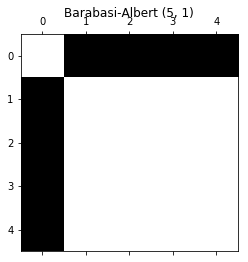

In [8]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)');

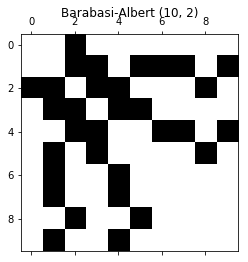

In [9]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)');

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

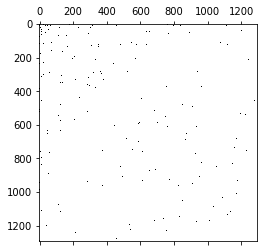

In [10]:
# Your code here.
n = n_nodes
m0 = 2
m = int((n_edges - m0)/(n-m0))
ba_network = barabasi_albert(n_nodes, m, m0, 123)
plt.spy(ba_network);

**Your answer here**

For the number of nodes, we simply chose the number of nodes in our network. For m0, we chose 2 and for the parameter m, we first calculated the exact number that we needed: the remaining number of edges that we have to put: n_edges - m0 (because each initial node (m0) has only one edge) divide by the remaining nodes that we have to add to the network: n-m0.


Finally, the BA algorithm needs an integer for m, so we rounded down the exact m calculated, meaning that our new system is going to have less edges than our real network.

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [11]:
# Your code here.
n_edges_ER = number_edges(er_network)            
n_edges_BA = number_edges(ba_network)
            
print('Number of edges in our real network:', n_edges,'.\n'
            'Number of edges in the ER network:',int(n_edges_ER),'.\n'
                 'Number of edges in the BA network:', int(n_edges_BA), '.')

Number of edges in our real network: 3172 .
Number of edges in the ER network: 3115 .
Number of edges in the BA network: 2583 .


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [12]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    length = len(p)
    kl = 0
    
    for i in range(0,length):
        if p[i] == 0:
            kl = kl + 0
        else:
            kl = kl + p[i] * np.log(p[i]/q[i])
        
    return kl

##### **Question**
What do they mean (on Moodle) by: if node not connected, KL undefined? where in the definition of KL, do they talk about Q(0) = 0?
Also, what if Q(i) = 0? In the wikipedia, it's not defined, but it's totally possible to have a 0 probability for a certain degree in one of the two networks we are trying to compare?!

In [13]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [30]:
# Your code here.
degree_network = adjacency.sum(axis=0)
w_network = np.ones_like(degree_network) / float(n_nodes)

degree_ER = er_network.sum(axis=0)
w_ER = np.ones_like(degree_ER) / float(n_nodes)

degree_BA = ba_network.sum(axis=0)
w_BA = np.ones_like(degree_BA) / float(n_nodes)

BINS = 0
if np.amax(degree_network) > BINS:
    BINS = np.amax(degree_network)
if np.amax(degree_BA) > BINS:
    BINS = np.amax(degree_BA)
if np.amax(degree_ER) > BINS:
    BINS = np.amax(degree_ER)

division = 1;
#spacing_bins = np.linspace(0,(BINS+1),int((BINS+1)/division)+1);

spacing_BA = np.linspace(0,BINS,int(BINS+1))

hist = np.histogram(degree_network, bins = spacing_bins, weights = w_network)[0]
#hist_ER = np.histogram(degree_ER, bins = spacing_bins, weights = w_ER)[0]
d = hist_BA = np.histogram(degree_BA, bins = spacing_BA, weights = w_BA)

print(d, BINS)
#d = plt.hist(degree_ER, weights = w_ER, fc = (1,0,0,0.7))
#plt.hist(degree_network, bins = d[1], weights = w_network)

#q = plt.hist(degree_BA, bins = 2, weights = w_BA)

#print('KL divergence between our network and the ER synthetic newtork:',kl_divergence(hist,hist_ER),'.\n'
#        'KL divergence between our network and the BA synthetic newtork:',kl_divergence(hist,hist_BA), '.')

(array([0.        , 0.        , 0.51198763, 0.18174787, 0.11136891,
       0.05336427, 0.03402939, 0.02320186, 0.02397525, 0.00928074,
       0.01160093, 0.00464037, 0.00386698, 0.00618716, 0.00154679,
       0.00154679, 0.00154679, 0.0007734 , 0.00154679, 0.        ,
       0.00232019, 0.0007734 , 0.        , 0.0007734 , 0.0007734 ,
       0.00309358, 0.        , 0.        , 0.        , 0.0007734 ,
       0.        , 0.        , 0.0007734 , 0.0007734 , 0.        ,
       0.        , 0.        , 0.        , 0.00154679, 0.0007734 ,
       0.        , 0.0007734 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0007734 , 0.        , 0.        , 0.        ,
       0.0007734 , 0.        , 0.        , 0.        , 0.        ,
       0.0007734 , 0.        , 0.        , 0.0007734 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0007734 ,
       0.        , 0.        , 0.        , 0.        , 0.    

##### **Remark**

Concerning the **bins** option of the function *np.histogram*, we decided to take the highest degree (parameter ***BINS***) of all the networks we have and create an equally space vector that would regroup the degree that are close together, but not similar. After several attemps, we decided to regroup degree by 2 (meaning degree 0 and 1 are together, 2 and 3 as well, etc...).


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [ ]:
# Your code here.
degree_network = adjacency.sum(axis=0)
w_network = np.ones_like(degree_network) / float(n_nodes)

degree_ER = er_network.sum(axis=0)
w_ER = np.ones_like(degree_ER) / float(n_nodes)

degree_BA = ba_network.sum(axis=0)
w_BA = np.ones_like(degree_BA) / float(n_nodes)

division = 1;
spacing_bins_plot = np.linspace(0,(BINS+1),int((BINS+1)/division)+1)

plt.hist(degree_network, bins = spacing_bins_plot, weights = w_network, fc = (1,0,0,0.7));
plt.hist(degree_BA, bins = spacing_bins_plot, weights = w_BA, fc = (0,1,0,0.6));
plt.hist(degree_ER, bins = spacing_bins_plot, weights = w_ER, fc = (0,0,1,0.5));
plt.legend(['Real network', 'BA synthetic network', 'ER synthetic network']);

**Your answer here.**

-> répondre après précisions de l'assistante au niveau du KL divergence

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

If you have the same degree distribution and that your regroup your degree the same way for your histogram, meaning you give to the function *plt.hist* the same **bins** vector, you will end up with the same graph. 

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [ ]:
import networkx as nx

In [ ]:
d = nx.barabasi_albert_graph(n, m, 123)
u = nx.adjacency_matrix(d)
plt.spy(u);
np.amin(u.sum(axis=0)),u.sum(axis=0), u,u.sum(axis=None)/2, m, n

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

Characteristics of our network:
* Average degree small compared to the number of nodes (4.906 << 1293)
    * Degree distribution approximated by Poisson distribution
* Small number of highly connected nodes
    * No real cluster

In [ ]:
k_mean = np.mean(adjacency.sum(axis=0))
k_mean, np.log(n_nodes)

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**